In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow import keras
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [2]:
#silueta -lectura de datos
from processing import load_image_dataset

x_slhtt_train, y_slhtt_train = load_image_dataset('Datasets/espe/silueta/train', (40, 40), False)
x_slhtt_test, y_slhtt_test = load_image_dataset('Datasets/espe/silueta/test', (40, 40), False)
x_slhtt_val, y_slhtt_val = load_image_dataset('Datasets/espe/silueta/validation', (40, 40), False)

(463, 40, 40, 3)

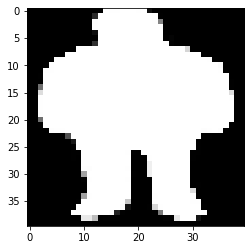

In [3]:
#plot the first image in the dataset
plt.imshow(x_slhtt_train[0])
x_slhtt_train.shape


In [4]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(40,40,3)))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(keras.layers.Dropout(0.3))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(500, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.4))
cnn_model.add(keras.layers.Dense(7, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
loss_function = tf.keras.losses.CategoricalCrossentropy()

optimization_function = tf.keras.optimizers.RMSprop(lr=1e-3)


cnn_model.compile(loss='categorical_crossentropy', optimizer=optimization_function, metrics=['acc'])


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=4, verbose=1, min_delta=1e-2)
callbacks_list = [stop_early, reduce_lr]

In [7]:
from keras.callbacks import ModelCheckpoint

def train_model(model, saved_model_output, batch_size, epochs, plot_history=True):
    checkpointer = ModelCheckpoint(filepath=saved_model_output, save_best_only=True)
    
    history = model.fit(x_slhtt_train, 
                     y_slhtt_train, 
                     batch_size=batch_size, 
                     epochs=epochs, validation_data=(x_slhtt_val, y_slhtt_val), 
                     callbacks=callbacks_list, 
                     shuffle=True)
    
    if plot_history:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

Train on 463 samples, validate on 103 samples
Epoch 1/30
463/463 [==============================] - 1s 2ms/sample - loss: 156.3476 - acc: 0.1512 - val_loss: 125.0797 - val_acc: 0.1456
Epoch 2/30
463/463 [==============================] - 1s 1ms/sample - loss: 105.7346 - acc: 0.1598 - val_loss: 31.9184 - val_acc: 0.1456
Epoch 3/30
463/463 [==============================] - 1s 1ms/sample - loss: 26.1344 - acc: 0.1620 - val_loss: 5.5850 - val_acc: 0.1456
Epoch 4/30
463/463 [==============================] - 1s 2ms/sample - loss: 7.7433 - acc: 0.2462 - val_loss: 3.9565 - val_acc: 0.2233
Epoch 5/30
463/463 [==============================] - 1s 2ms/sample - loss: 6.2798 - acc: 0.3197 - val_loss: 3.6108 - val_acc: 0.2621
Epoch 6/30
463/463 [==============================] - 1s 2ms/sample - loss: 4.7647 - acc: 0.3434 - val_loss: 3.5248 - val_acc: 0.2233
Epoch 7/30
463/463 [==============================] - 1s 1ms/sample - loss: 4.2006 - acc: 0.3629 - val_loss: 4.0088 - val_acc: 0.2524
Epoch 8/

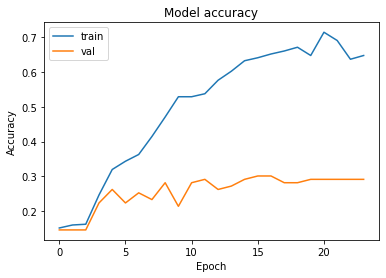

In [8]:
CNN_BEST_MODEL_OUTPUT = 'Datasets/cnn.cifar10.rgbMaskImage.h5'

EPOCHS = 30
BATCH_SIZE = 256
train_model(cnn_model, CNN_BEST_MODEL_OUTPUT, BATCH_SIZE, EPOCHS)

In [9]:
mlp_score = cnn_model.evaluate(x_slhtt_test, y_slhtt_test)
print(f'MLP test accuracy: {100 * mlp_score[1]}%')
#rgb -> 70.70707082748413%
#silueta -> 19.191919267177582%
#histograma ->61.616164445877075%

99/99 [==============================] - 0s 584us/sample - loss: 2.9565 - acc: 0.1919
MLP test accuracy: 19.191919267177582%


In [ ]:
# mixto 

# a =color_histogram_branch()
#     #b = silhouette_features_branch()
# c = cnn()
# fussion = keras.layers.concatenate([a.output, c.output])
# fm = keras.layers.BatchNormalization()(fussion)
# fm = keras.layers.Dense(units=128,activation='relu')(fm)
# fm =  keras.layers.LeakyReLU()(fm)
# fm =  keras.layers.BatchNormalization()(fm)
# fm =    keras.layers.Dropout(0.5)(fm)
# prediction =keras.layers.Dense(units=7, activation='softmax')(fm)
# model = keras.models.Model(inputs=[a.input, c.input], outputs=prediction)
# my_adam = tf.keras.optimizers.Adam(lr=0.0025, beta_1=0.9, beta_2=0.999, amsgrad=True)
# my_loss =  tf.keras.losses.categorical_crossentropy
# model.compile(loss='categorical_crossentropy', optimizer=optimization_function, metrics=['accuracy'])

In [ ]:
#imagen 
def cnn():
    cnn_model = keras.Sequential()
    cnn_model.add(keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(40,40,3)))
    cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
    cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
    cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    cnn_model.add(keras.layers.MaxPooling2D(pool_size=2))
    cnn_model.add(keras.layers.Dropout(0.3))
    cnn_model.add(keras.layers.Flatten())
    cnn_model.add(keras.layers.Dense(500, activation='relu'))
    cnn_model.add(keras.layers.Dropout(0.4))
    #cnn_model.add(keras.layers.Dense(7, activation='softmax'))
    return cnn_model